In [1]:
x = [1, 9, 4];
class Consumer:
    def __init__(self, w):
        self.wealth = w;
        
    def earn(self, y):
        self.wealth += y;
        

c1 = Consumer(10);
dir(c1)    
    
#NOTE: calling class-object-functions like this mutates the class object...
#passed to the function.
Consumer.earn(c1, 10)
c1.wealth

20

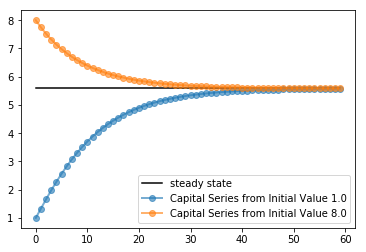

In [3]:
import numpy as npy
import matplotlib.pyplot as plt

class Solow:
    
    r"""
    Implements the Solow growth model with updation
    
    ..math::
        k_{t+1} = \frac{s z k^{\alpha}_t}{1+n} + k_t \frac{1-d}{1+n}
    """
    
    def __init__(self, n, s, d, alpha, z, k):
        self.n, self.s, self.d = n, s, d;
        self.alpha, self.z, self.k = alpha, z, k;
        
    def h(self):
        """
        Evaluates the 'h' function
        """
        
        temp = self.s * self.z * self.k**self.alpha + (1-self.d)*self.k;
        temp /= 1 + self.n;
        
        return temp;
    
    def update(self):
        self.k = self.h();
        
    def steady_state(self):
        return ((self.s * self.z) / (self.n + self.d)) ** (1/(1-self.alpha));
    
    def generate_sequence(self, t):
        "Generate and return a time series of length 't'"
        path = [0] * t;
        
        for idx in range(t):
            path[idx] = self.k;
            self.update();
            
        return path;

baseline_params = 0.05, 0.25, 0.1, 0.3, 2.0, 1.0;
s1 = Solow(*baseline_params);
s2 = Solow(*baseline_params);
s2.k = 8.0;
T = 60;
fig, ax = plt.subplots();

ax.plot([s1.steady_state()]*T, 'k-', label='steady state');
for s in s1, s2:
    lbl_string = r"Capital Series from Initial Value {0}".format(s.k);
    ax.plot(s.generate_sequence(T), 'o-', linewidth=2, alpha=0.6, label=lbl_string);

ax.legend(loc="lower right");
plt.show();

In [79]:
import numpy as npy
import matplotlib.pyplot as plt

class Chaos:
    
    def __len__(self):
        return self.r**2;
    
    def __call__(self, x):
        return (x+r**2);
    
    def __init__(self, x0, r):
        """
        Initialize with state x0 and parameter 'r'.
        """
        self.x, self.r = x0, r;
        
    def update(self):
        '''
        Update object state.
        '''
        
        self.x = self.r * self.x*(1-self.x);
        
    def generate_sequence(self, T):
        """
        Generate a time-series by continually updating the object's data
        """
    
        path = [0] * T;
        for idx in range(0, T):
            path[idx] = self.x;
            self.update();
        
        return path;
    
c1 = Chaos(0.1, 4);
print(c1(9));
print(id(Chaos))

25.040024999999744
2280468629688


In [25]:
#Exercise 1:
import numpy as npy

class ECDF:
    def __init__(self, data_list):
        self.observations = npy.asarray(data_list);
        self.observations.sort();
        
    def __call__(self, x):
        search_idx = npy.searchsorted(self.observations, x);
        probab = sum(self.observations[:search_idx+1])/len(self.observations);
        return probab;

samples = [npy.random.uniform(0, 1) for idx in range(10)];
F = ECDF(samples);

print(F(0.5));

0.205324963388


In [4]:
#Exercise 2:

class Polynomial:
    def __init__(self, coeff_array):
        self.coeffs = npy.asarray(coeff_array);
        
    def __call__(self, x):
        #create an array of powers of 'x'
        x_array = x * npy.ones(self.coeffs.size); x_array[0] = 1;
        x_array = npy.cumprod(x_array);
        
        #multiply the array with the coeffs
        return sum(x_array * self.coeffs);
    
    def derive(self):
        self.coeffs = self.coeffs[1:];
        self.coeffs = self.coeffs * npy.linspace(1.0, len(self.coeffs), len(self.coeffs));
    
p = Polynomial([1, 2, 1]);
p.derive();
print(p(1));

4.0


In [5]:
x = [1, 2, 3, 4];
x[0:-1]

[1, 2, 3]

1
2
3
5
6
7
